In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

In [2]:
car_price = pd.read_csv('car_price.csv')

In [3]:
car_price

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
car_price.columns = car_price.columns.str.lower().str.replace(' ', '_')

In [5]:
string_columns = list(car_price.dtypes[car_price.dtypes == 'object'].index) # B
for col in string_columns:
    car_price[col] = car_price[col].str.lower().str.replace(' ', '_')

In [6]:
car_price.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<AxesSubplot:xlabel='msrp'>

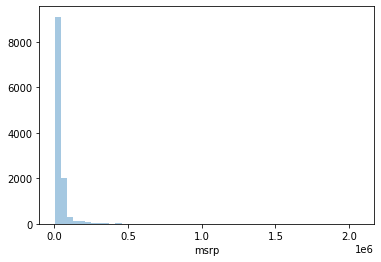

In [7]:
sns.distplot(car_price.msrp,kde=False)

<AxesSubplot:xlabel='msrp'>

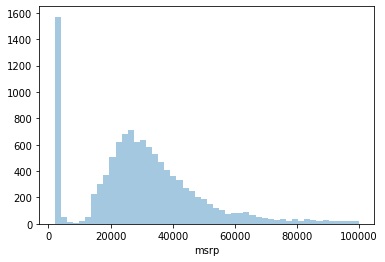

In [8]:
sns.distplot(car_price.msrp[car_price.msrp < 100000], kde=False)

<AxesSubplot:xlabel='msrp'>

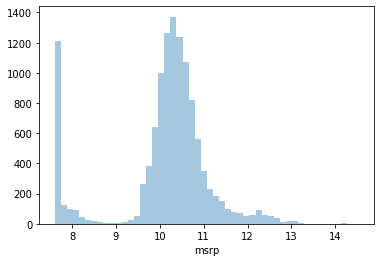

In [9]:
car_price.msrp = np.log1p(car_price.msrp)
sns.distplot(car_price.msrp, kde=False)

In [10]:
train, test = train_test_split(car_price,test_size=0.4, random_state=43)
val,test = train_test_split(test,test_size=0.5, random_state=43)

In [11]:
len(car_price),len(train)/len(car_price),len(val)/len(car_price),len(test)/len(car_price)

(11914, 0.5999664260533826, 0.2000167869733087, 0.2000167869733087)

In [12]:
def extract_features(df):
    X = df.loc[ : , df.columns != 'msrp']
    y = df['msrp']
    return X,y

In [53]:
class CustomTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def change(self, X):
        X = X.copy()
        X['age'] = 2017-X.year
        X['number_of_doors'] = X['number_of_doors'].astype(str)
        return X
    
    def fit(self,X,y=None):
        self.change(X)
        return self
    
    def transform(self,X,y=None):
        return self.change(X)

In [79]:
car_price.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [112]:
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity','age']
categorical = ['number_of_doors','make','engine_fuel_type','transmission_type','vehicle_size']
## 'model','driven_wheels','vehicle_style','market_category'

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe, categorical),
    ('num', num_pipe, numerical)
])

pipe = Pipeline([
    ('custom',CustomTransformer()),
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=0.01))
])

In [113]:
X_train,y_train = extract_features(train)
pipe.fit(X_train,y_train)
X_val,y_val = extract_features(val)
y_pred = pipe.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

0.42501524674267627

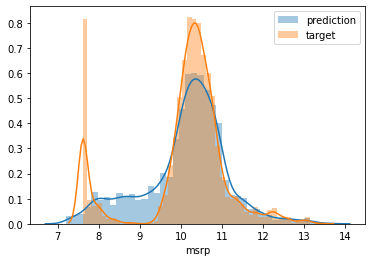

In [114]:
sns.distplot(y_pred, label='prediction') 
sns.distplot(y_val, label='target') 
plt.legend()

In [115]:
X_test,y_test = extract_features(test)
y_pred = pipe.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)

0.4250735967347248